In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# HIERARCHICAL CLUSTERING

In [3]:
data=pd.read_csv("crime_data.csv")
data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.iloc[:,1:])

In [19]:
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

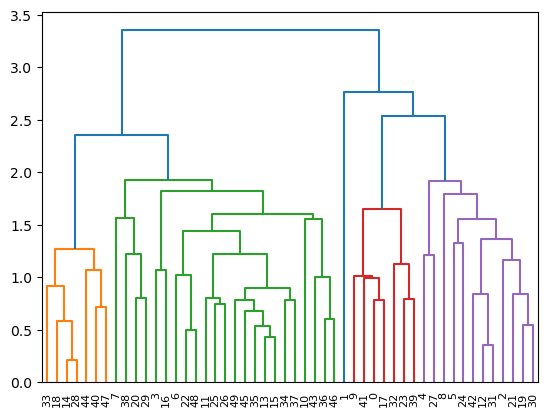

In [23]:
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='average'))

In [24]:
h_cluster = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [25]:
h_cluster.fit(scaled_data)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [26]:
h_cluster.labels_

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
data["h_cluster"]=h_cluster.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


<AxesSubplot:xlabel='h_cluster', ylabel='Count'>

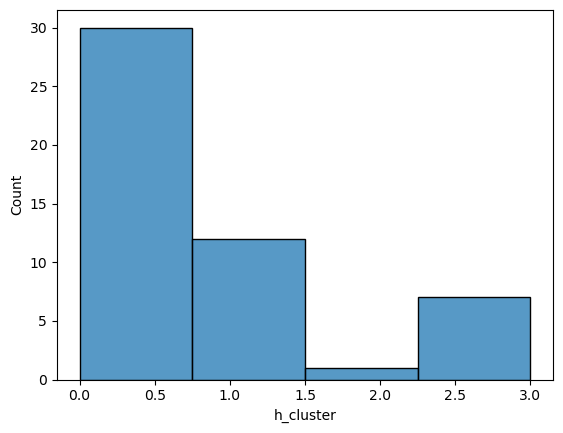

In [29]:
sn.histplot(data=data,x="h_cluster",bins=4)

In [30]:
data["h_cluster"].value_counts()

0    30
1    12
3     7
2     1
Name: h_cluster, dtype: int64

In [36]:
data.loc[data["h_cluster"]==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
1,Alaska,10.0,263,48,44.5,2


# KMEANS CLUSTERING

In [38]:
from sklearn.cluster import KMeans

D:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


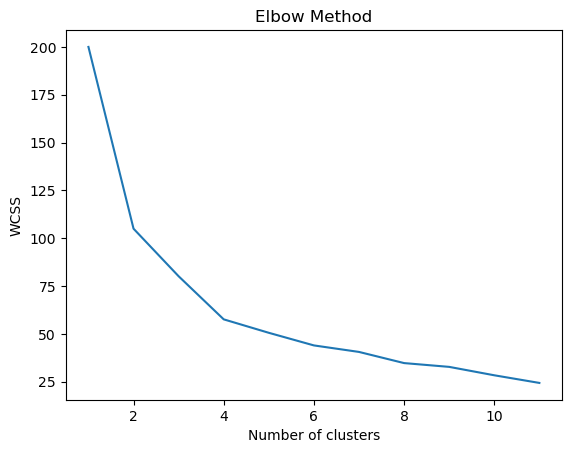

In [39]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TAKING K=4 FROM THE ELBOW METHOD

In [40]:
k_cluster=KMeans(n_clusters=4,random_state=42)
k_cluster.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [41]:
k_cluster.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [42]:
data["k_cluster"]=k_cluster.labels_
data


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster,k_cluster
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,2,2
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,2
5,Colorado,7.9,204,78,38.7,1,2
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,2
9,Georgia,17.4,211,60,25.8,3,1


Text(0, 0.5, 'US STATES')

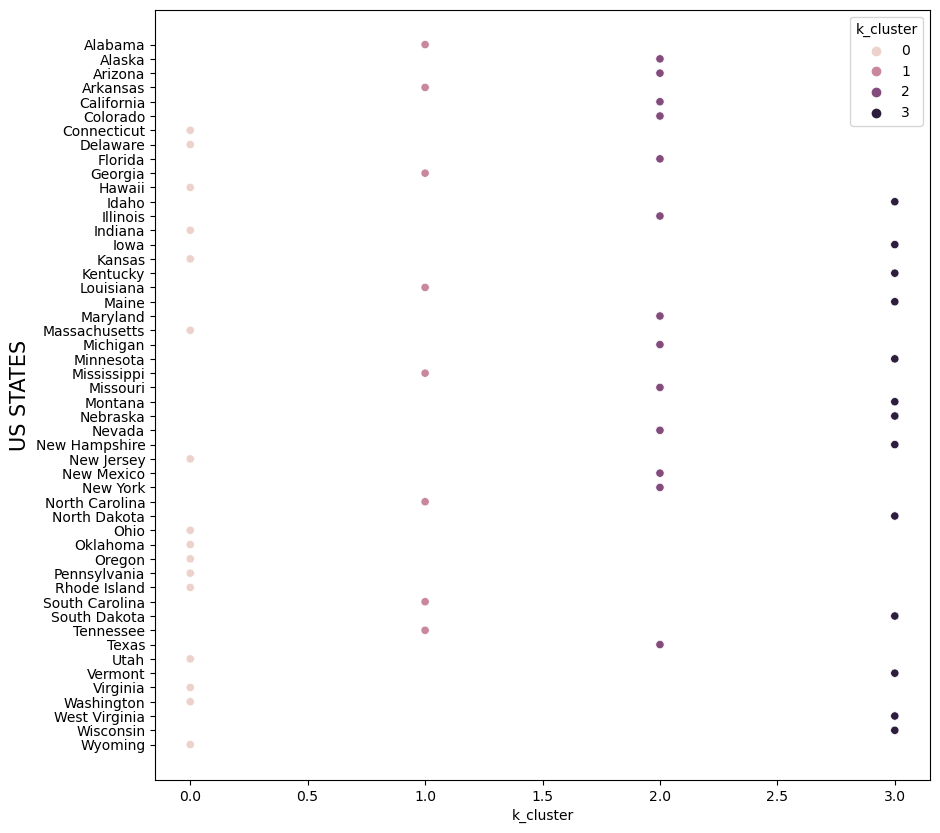

In [59]:
plt.figure(figsize=(10,10))
sn.scatterplot(data=data,x="k_cluster",y="Unnamed: 0",hue="k_cluster")
plt.ylabel("US STATES",size=15)

In [55]:
data["k_cluster"].value_counts()

0    16
2    13
3    13
1     8
Name: k_cluster, dtype: int64

# DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
from sklearn.neighbors import NearestNeighbors

In [63]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

In [64]:
distances

array([[0.        , 0.78006247, 0.84928467, 0.92509451, 1.14292205],
       [0.        , 2.07898369, 2.13697134, 2.30088403, 2.35013877],
       [0.        , 1.0482199 , 1.08341076, 1.09354181, 1.20621365],
       [0.        , 1.0013278 , 1.00722663, 1.07057017, 1.24148411],
       [0.        , 1.20897691, 1.30069114, 1.32378897, 1.53005165],
       [0.        , 1.24886253, 1.30069114, 1.32606825, 1.37888923],
       [0.        , 0.88100359, 0.95643249, 0.99437327, 1.04597225],
       [0.        , 1.19227586, 1.27140067, 1.42312615, 1.45285466],
       [0.        , 1.30974334, 1.34926273, 1.45009454, 1.5890679 ],
       [0.        , 0.86797806, 1.02250187, 1.14292205, 1.41119063],
       [0.        , 1.08184506, 1.16110091, 1.22422969, 1.34114677],
       [0.        , 0.75913104, 0.81522244, 0.83710697, 0.85722678],
       [0.        , 0.35377437, 0.83250223, 1.09354181, 1.35292516],
       [0.        , 0.43312429, 0.53571007, 0.61894533, 0.70471473],
       [0.        , 0.2079438 , 0.

In [70]:
distances = np.sort(distances, axis=0)

Text(0, 0.5, 'epsilon value ')

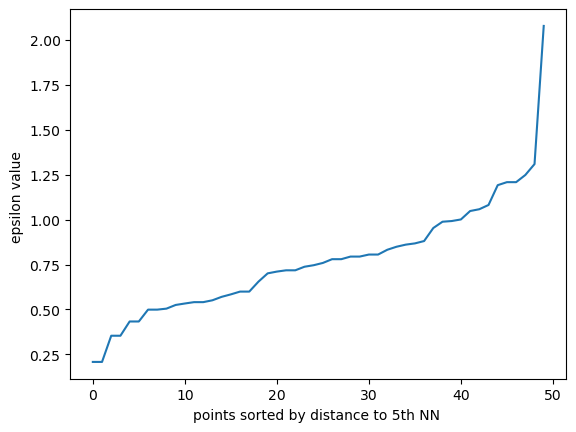

In [83]:
plt.plot(distances)
plt.xlabel("points sorted by distance to 5th NN ")
plt.ylabel("epsilon value ")

TAKING EPSILON VALUE 1.25 REFERRING THE MAXIMUM CURVATURE ON THE ABOVE GRAPH

In [78]:
db_cluster=DBSCAN(eps=1.25,min_samples=5)
db_cluster.fit(scaled_data)

DBSCAN(eps=1.25)

In [79]:
db_cluster.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [80]:
data["db_cluster"]=db_cluster.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster,k_cluster,db_cluster
0,Alabama,13.2,236,58,21.2,3,1,0
1,Alaska,10.0,263,48,44.5,2,2,-1
2,Arizona,8.1,294,80,31.0,1,2,1
3,Arkansas,8.8,190,50,19.5,0,1,2
4,California,9.0,276,91,40.6,1,2,-1
5,Colorado,7.9,204,78,38.7,1,2,1
6,Connecticut,3.3,110,77,11.1,0,0,2
7,Delaware,5.9,238,72,15.8,0,0,2
8,Florida,15.4,335,80,31.9,1,2,-1
9,Georgia,17.4,211,60,25.8,3,1,0


Text(0, 0.5, 'US STATES')

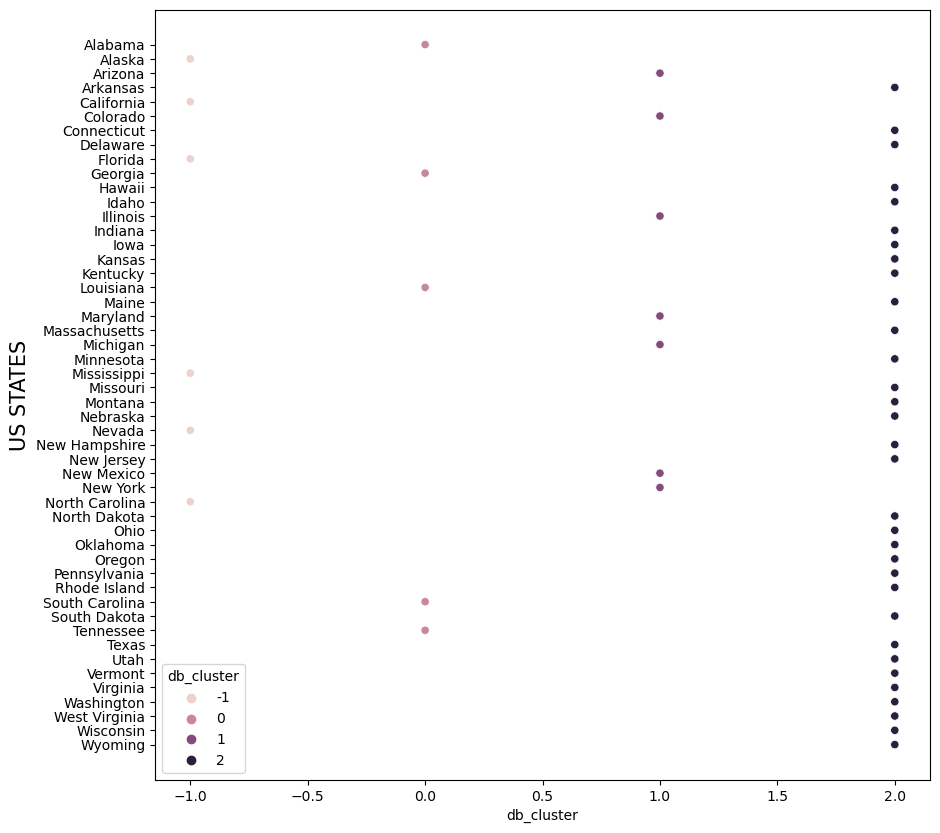

In [84]:
plt.figure(figsize=(10,10))
sn.scatterplot(data=data,x="db_cluster",y="Unnamed: 0",hue="db_cluster")
plt.ylabel("US STATES",size=15)

In [81]:
data["db_cluster"].value_counts()

 2    32
 1     7
-1     6
 0     5
Name: db_cluster, dtype: int64